<a href="https://colab.research.google.com/github/juanfherrer/Optimizaci-n/blob/main/Centro_de_Transformaci%C3%B3n_de_Frutales_del_Quind%C3%ADo_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Centro de Transformación de Frutales del Quindío.*

Objetivo del ejercicio
Construir y entrenar un modelo de regresión lineal múltiple para predecir la producción procesada mensual (en kg), considerando:

Kilos de fruta fresca recibida

Tipo de fruta (codificada)

Mano de obra utilizada (número de operarios)

Temperatura promedio del mes (°C)

Horas efectivas de procesamiento

📁 Paso 1: Dataset simulado realista
Vamos a crear un pequeño DataFrame con estos campos:

In [8]:
import pandas as pd
import numpy as np

np.random.seed(42)  # Reproducibilidad

# Simular 30 registros
n = 30
fechas = pd.date_range(start='2023-01-01', periods=n, freq='M')

data = pd.DataFrame({
    'Fecha': fechas,
    'FrutaRecibida': np.random.normal(loc=800, scale=150, size=n).astype(int),  # Promedio 800 kg
    'TipoFruta': np.random.choice([1, 2, 3], size=n),  # 1=Guayaba, 2=Feijoa, 3=Uchuva
    'Operarios': np.random.randint(3, 8, size=n),  # Entre 3 y 7 operarios
    'Temperatura': np.random.normal(loc=24, scale=2.5, size=n),  # Promedio 24°C
    'HorasProcesamiento': np.random.randint(4, 10, size=n)  # Entre 4 y 9 horas
})

# Simular ProducciónProcesada con algo de lógica (por ejemplo, 75% fruta recibida + influencia de horas)
data['ProducciónProcesada'] = (
    data['FrutaRecibida'] * 0.75
    + data['HorasProcesamiento'] * 5
    - data['Temperatura'] * 2
    + np.random.normal(loc=0, scale=50, size=n)  # ruido
).astype(int)

# Mostrar primeras filas
data.head()


<ipython-input-8-fd90311481f0>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range(start='2023-01-01', periods=n, freq='M')


,Fecha,FrutaRecibida,TipoFruta,Operarios,Temperatura,HorasProcesamiento,ProducciónProcesada
0,2023-01-31,874,3,4,22.802064,9,667
1,2023-02-28,779,3,7,23.535853,9,578
2,2023-03-31,897,1,4,21.234163,6,564
3,2023-04-30,1028,3,3,21.009483,5,752
4,2023-05-31,764,3,6,26.031315,7,558


Entrenar el modelo de regresión lineal multiple

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Variables predictoras y objetivo
X = df[['FrutaRecibida', 'TipoFruta', 'Operarios', 'Temperatura', 'HorasProcesamiento']]
y = df['ProducciónProcesada']

# Modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Predicción
y_pred = modelo.predict(X)

# Resultados
print("Intercepto (β₀):", modelo.intercept_)
print("Coeficientes (β₁...β₅):", modelo.coef_)
print("R² del modelo:", r2_score(y, y_pred))


Intercepto (β₀): -75.14892317712724
Coeficientes (β₁...β₅): [ 0.73684759  0.27711112  5.68167684 -2.04384083 14.18856604]
R² del modelo: 0.8307396685506272


Paso 3: Interpretación de los coeficientes
El modelo te dirá cuánto influye cada variable en la producción. Por ejemplo:

β₁ (FrutaRecibida) podría ser ≈ 0.6

β₂ (TipoFruta): diferencia en rendimiento entre fresa y mora

β₃ (Operarios): más personas, más capacidad de procesamiento

β₄ (Temperatura): la eficiencia puede cambiar con la temperatura ambiente

β₅ (HorasProcesamiento): más horas, más producción

Paso 4: Visualizar resultados

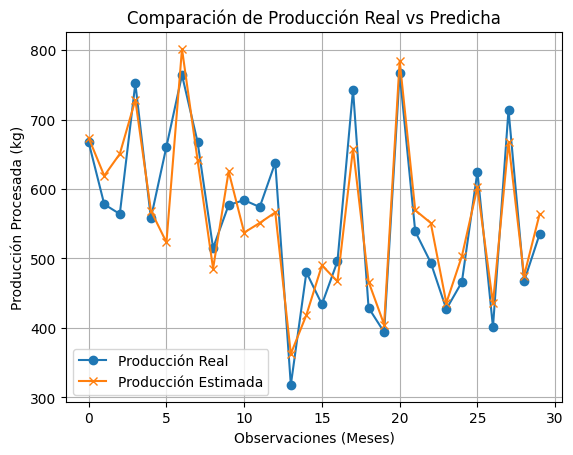

In [11]:
import matplotlib.pyplot as plt

# Comparar predicciones vs valores reales
plt.plot(y.values, label='Producción Real', marker='o')
plt.plot(y_pred, label='Producción Estimada', marker='x')
plt.xlabel("Observaciones (Meses)")
plt.ylabel("Producción Procesada (kg)")
plt.title("Comparación de Producción Real vs Predicha")
plt.legend()
plt.grid(True)
plt.show()


🔄 Paso 5: Prueba el modelo con nuevos datos

In [12]:
# Nuevo mes con datos
nueva_entrada = pd.DataFrame({
    'FrutaRecibida': [1450],
    'TipoFruta': [1],           # mora
    'Operarios': [7],
    'Temperatura': [20],
    'HorasProcesamiento': [47]
})

# Predicción
prediccion = modelo.predict(nueva_entrada)
print("Producción estimada:", round(prediccion[0], 2), "kg")

Producción estimada: 1659.31 kg


In [13]:
import statsmodels.api as sm

# Agregamos constante (intercepto)
X_const = sm.add_constant(X)

# Ajustamos modelo
modelo_stats = sm.OLS(y, X_const).fit()

# Resumen del modelo con errores estándar
print(modelo_stats.summary())


                             OLS Regression Results                            
Dep. Variable:     ProducciónProcesada   R-squared:                       0.831
Model:                             OLS   Adj. R-squared:                  0.795
Method:                  Least Squares   F-statistic:                     23.56
Date:                 Sun, 20 Apr 2025   Prob (F-statistic):           1.55e-08
Time:                         20:38:38   Log-Likelihood:                -159.16
No. Observations:                   30   AIC:                             330.3
Df Residuals:                       24   BIC:                             338.7
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -75.1

1. Importar librerías y preparar los datos

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar variables independientes (X) y dependiente (y)
X = data[['FrutaRecibida', 'TipoFruta', 'Operarios', 'Temperatura', 'HorasProcesamiento']]
y = data['ProducciónProcesada']

# Agregar constante al modelo
X = sm.add_constant(X)


2. Ajustar modelo de regresión

Este paso imprimirá una tabla con:

Coeficientes estimados (coef)

Errores estándar (std err)

Valores t y p para cada coeficiente

R² (bondad del ajuste)

Estadísticos F y de normalidad

In [ ]:
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

3. Visualizar la relación real vs predicción

In [ ]:
# Predicciones del modelo
data['Predicción'] = modelo.predict(X)

# Gráfico real vs predicho
plt.figure(figsize=(10,6))
sns.lineplot(data=data, x='Fecha', y='ProducciónProcesada', label='Real')
sns.lineplot(data=data, x='Fecha', y='Predicción', label='Predicción')
plt.title('Producción Procesada Real vs Predicción')
plt.ylabel('Kg')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()